In [1]:
import copy
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from pre_processing import *
from algorithms import *
from spectrum_gen import *
from data_gen import *
from analysis import *
from datasets import *
from evaluation import *
#cr_filtering()
#cr_read_norm()1dasdas
import h5py
import scanpy as sc
from sklearn.metrics import adjusted_rand_score
n_obs=1000 #number of observations per timepoint


In [2]:
adata = read_liver_data_2(n_obs=n_obs) #read data
adata = sort_data_crit(adata=copy.deepcopy(adata.copy()),crit='ZT',crit_list=['0','6','12','18']) #sort the data according to the timepoints
adata

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/jonathankarin/.conda/envs/spctral_jan/l

View of AnnData object with n_obs × n_vars = 4000 × 14812
    obs: 'ZT', 'layer', 'batch'

In [3]:

#standard pre-processing
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.filter_genes_dispersion(adata, n_top_genes=7000)
orig_adata = copy.deepcopy(adata.copy())



/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [4]:
r_genes = ['bmal1', 'clock', 'npas2', 'nr1d1', 'nr1d2', 'per1', 'per2', 'cry1', 'cry2', 'dbp',
           'tef', 'hlf', 'elovl3', 'rora', 'rorc']

In [5]:
sc.tl.score_genes_cell_cycle(adata, s_genes=r_genes[5:], g2m_genes=r_genes[:5])


/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [6]:
sc.pp.regress_out(adata, ['S_score', 'G2M_score'])

         Falling back to preprocessing with `sc.pp.pca` and default params.


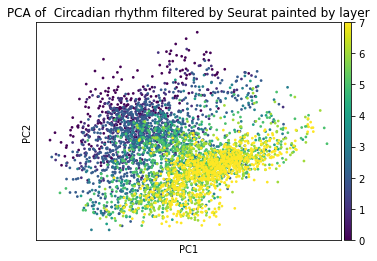

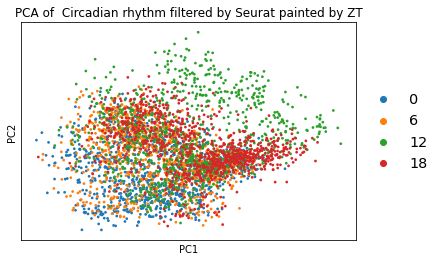

/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


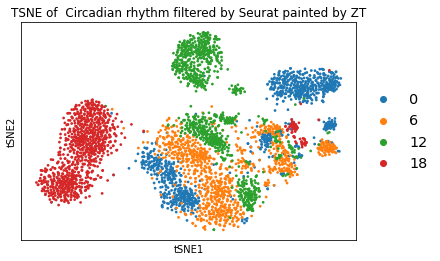

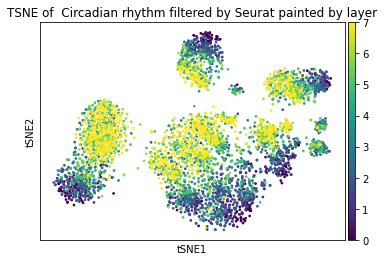

In [7]:
plots_liver(adata,title=" Circadian rhythm filtered by Seurat")


In [8]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(adata.X)
print(adjusted_rand_score(kmeans.labels_ , adata.obs['layer']))



kmeans = KMeans(n_clusters=4, random_state=0).fit(adata.X)
print(adjusted_rand_score(kmeans.labels_ , adata.obs['ZT']))


0.07406005562967823
0.10795991843002099


In [10]:
1

1